In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
def trapezoidal(x_data, y_data):
    """
    n interval number
    Error O(h^2)
    """
    h = x_data[1] - x_data[0]
    n = len(x_data) - 1

    integral = [0]
    for k in range(1, n + 1):
      integral.append(integral[k-1] + (y_data[k] + y_data[k-1])*h/2)
    return integral

In [51]:
def simpson(x_data, y_data):
    """
    Error O(h^4)
    """
    h = x_data[1] - x_data[0]
    n = len(x_data) - 1 # index of last point
    
    integral = [0]
    for k in range(0, n-1, 2):
      integral.append(integral[k//2] + (y_data[k] + 4*y_data[k+1] + y_data[k+2])*h/3)
    return integral

In [52]:
def simpson3_8(x_data, y_data):
    """
    Error O(h^4)
    """
    h = x_data[1] - x_data[0]
    n = len(x_data) - 1 # index of last point

    integral = [0]
    for k in range(0, n - 2, 3):
      integral.append(integral[k//3] + (y_data[k] + 3*y_data[k+1] + 3*y_data[k+2] + y_data[k+3])*h*3/8)
    return integral

### Plot

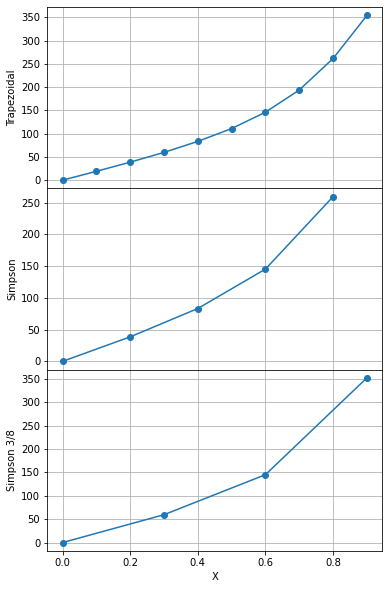

In [53]:
x_data = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
y_data = 1/np.array([0.0053, 0.0052, 0.005, 0.0045, 0.004, 0.0033, 0.0025, 0.0018, 0.00125, 0.00095])

int_trap = trapezoidal(x_data, y_data)
int_simp = simpson(x_data, y_data)
int_s38 = simpson3_8(x_data, y_data)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,  sharex=True, gridspec_kw={'hspace': 0})
fig.set_figheight(10)

ax1.plot(x_data, int_trap, marker="o")
ax1.grid(True)
ax1.set_xlabel("X")
ax1.set_ylabel("Trapezoidal")

ax2.plot(x_data[::2], int_simp, marker="o")
ax2.grid(True)
ax2.set_xlabel("X")
ax2.set_ylabel("Simpson")

ax3.plot(x_data[::3], int_s38, marker="o")
ax3.grid(True)
ax3.set_xlabel("X")
ax3.set_ylabel("Simpson 3/8")
plt.show()

### Table

In [65]:
n = len(x_data)
table = np.zeros((n, 5))
table[:, 0] = x_data
table[:, 1] = y_data
table[:, 2] = int_trap
table[::2, 3] = int_simp
table[::3, 4] = int_s38
pd.set_option("display.precision", 10)
pd.DataFrame(table, range(len(table[:, 0])), ['x', 'f(x)', 'Trapezoidal', 'Simpson', 'Simpson 3/8'])

,x,f(x),Trapezoidal,Simpson,Simpson 3/8
0,0.0,188.6792452830,0.0000000000,0.0000000000,0.0000000000
1,0.1,192.3076923077,19.0493468795,0.0000000000,0.0000000000
2,0.2,200.0000000000,38.6647314949,38.5970004838,0.0000000000
3,0.3,222.2222222222,59.7758426060,0.0000000000,59.5434204161
4,0.4,250.0000000000,83.3869537171,83.2266301134,0.0000000000
5,0.5,303.0303030303,111.0384688687,0.0000000000,0.0000000000
6,0.6,400.0000000000,146.1899840202,145.2973371841,145.0926628403
7,0.7,555.5555555556,193.9677617980,0.0000000000,0.0000000000
8,0.8,800.0000000000,261.7455395757,259.3714112582,0.0000000000
9,0.9,1052.6315789474,354.3771185231,0.0000000000,352.0663470508
